In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mplfinance

import requests
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime
import time
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


# **Member: Dipesh Limbachiya**

In [ ]:
import requests
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_stock_trend(symbol, start_date, end_date, api_key):
    url = f"https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",
        "apikey": api_key
    }

    print(f"\nFetching data for {symbol}...")
    response = requests.get(url, params=params)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print(f"Error fetching data: {data.get('Note', data)}")
        return None

    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient='index')
    df = df.rename(columns={
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",
        "4. close": "Close",
        "5. volume": "Volume"
    })
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    print(f"Data available from {df.index.min().date()} to {df.index.max().date()}")

    mask = (df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))
    df_filtered = df.loc[mask].copy()

    if df_filtered.empty:
        print(f"No data between {start_date} and {end_date}")
        return None

    df_filtered[["Open", "High", "Low", "Close"]] = df_filtered[["Open", "High", "Low", "Close"]].astype(float)
    df_filtered["Volume"] = pd.to_numeric(df_filtered["Volume"], errors="coerce")
    df_filtered["Trend_Label"] = df_filtered.apply(
        lambda row: "Bullish" if row["Close"] > row["Open"] else "Bearish", axis=1
    )

    return df_filtered

In [ ]:
api_key = "CWR4QR07SJ1EWE96"

# gets user input
symbol = input("Enter stock symbol (e.g., AAPL): ").upper()
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

df_filtered = analyze_stock_trend(symbol, start_date, end_date, api_key)

Enter stock symbol (e.g., AAPL): AAPL
Enter start date (YYYY-MM-DD): 2020-01-01
Enter end date (YYYY-MM-DD): 2020-02-01

Fetching data for AAPL...
Data available from 1999-11-01 to 2025-05-02


**ML/Stat:**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

Confusion Matrix:
[[1 0]
 [1 2]]


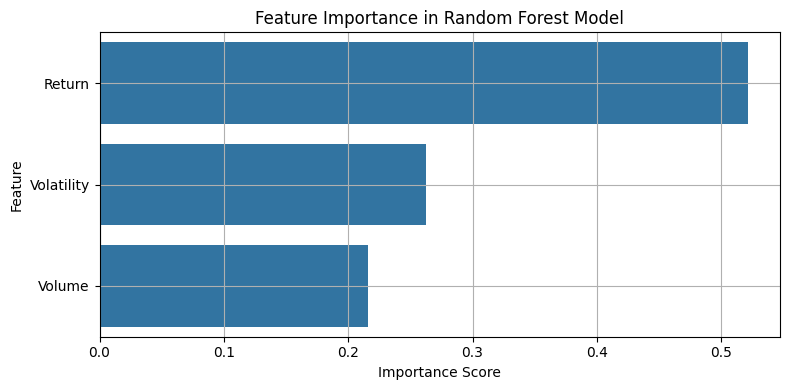

In [ ]:
if df_filtered is not None:
    df = df_filtered.copy()

    df["Return"] = df["Close"].pct_change()
    df["Volatility"] = df["Return"].rolling(window=5).std()
    df["Volume"] = pd.to_numeric(df["Volume"], errors="coerce")
    df["Trend"] = (df["Close"] > df["Open"]).astype(int)
    df.dropna(inplace=True)

    X = df[["Return", "Volatility", "Volume"]]
    y = df["Trend"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)

    y_pred = rf_model.predict(X_test_scaled)
    print("Random Forest Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    importances = rf_model.feature_importances_
    feature_names = ["Return", "Volatility", "Volume"]

    plt.figure(figsize=(8, 4))
    sns.barplot(x=importances, y=feature_names)
    plt.title("Feature Importance in Random Forest Model")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Visualization 1:**

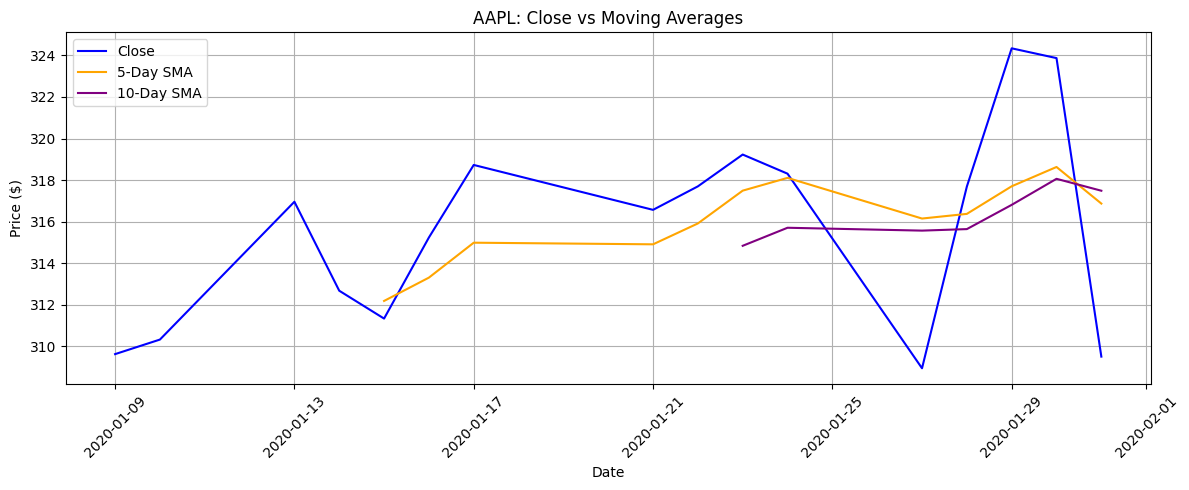

In [ ]:
`


**Visualization 2:**

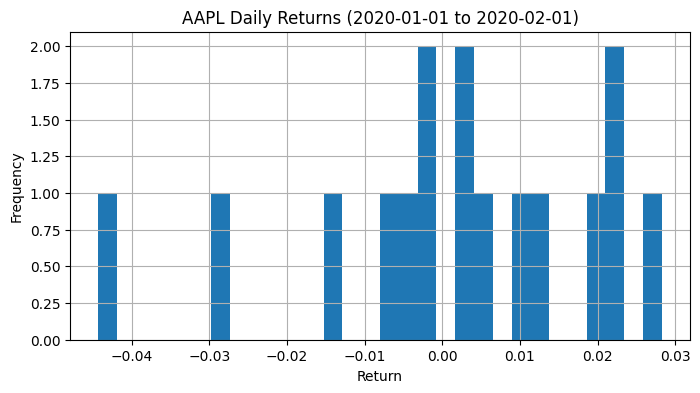

In [ ]:
# Visualization 2:
plt.figure(figsize=(8, 4))
df["Return"].hist(bins=30)
plt.title(f"{symbol} Daily Returns ({start_date} to {end_date})")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Additional:**

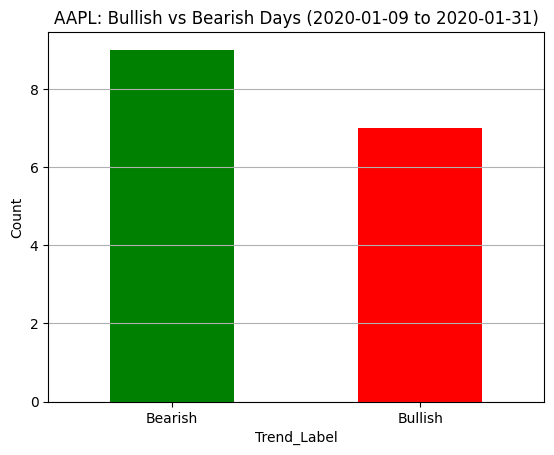

In [ ]:
# Additional:

start = df.index.min().strftime('%Y-%m-%d')
end = df.index.max().strftime('%Y-%m-%d')
df["Trend_Label"].value_counts().plot(kind="bar", color=["green", "red"])
plt.title(f"{symbol}: Bullish vs Bearish Days ({start} to {end})")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()


# **Member: Garima Kumar**

**ML/Stat:**

[[34  1]
 [ 8  6]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        35
           1       0.86      0.43      0.57        14

    accuracy                           0.82        49
   macro avg       0.83      0.70      0.73        49
weighted avg       0.82      0.82      0.79        49



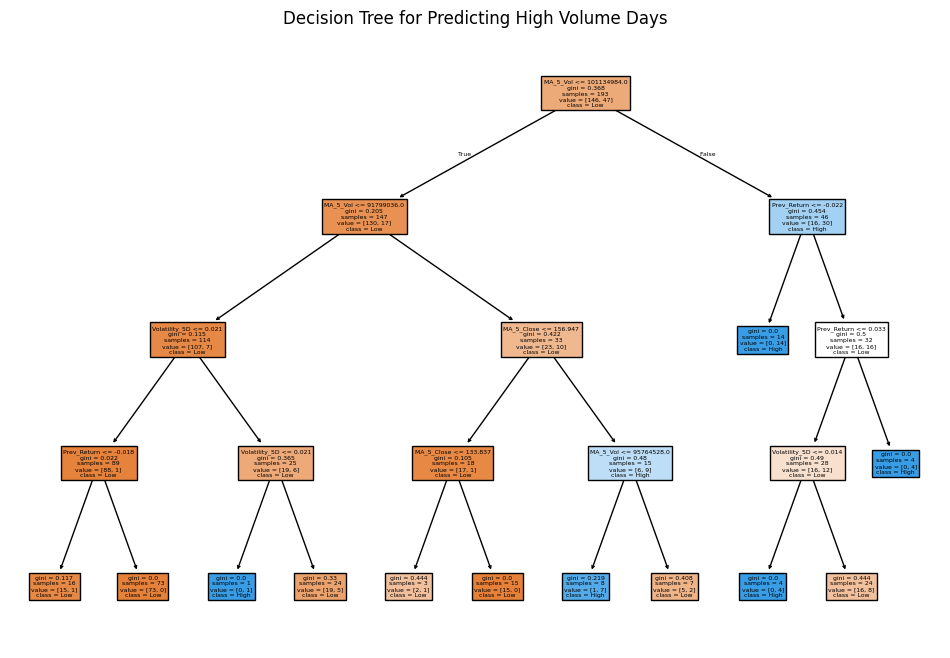

In [ ]:
# ML/Stat:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1 if high volume, 0 otherwise
volume_threshold = df['Volume'].quantile(0.75)
df['HighVolume'] = (df['Volume'] >= volume_threshold).astype(int)

# Features
df['Prev_Return'] = df['Daily Return'].shift(1)
df['MA_5_Close'] = df['Close'].rolling(5).mean()
df['MA_5_Vol'] = df['Volume'].rolling(5).mean()
df['Volatility_5D'] = df['Daily Return'].rolling(5).std()

# Clean
df_tree = df.dropna(subset=['HighVolume', 'Prev_Return', 'MA_5_Close', 'MA_5_Vol', 'Volatility_5D'])
X = df_tree[['Prev_Return', 'MA_5_Close', 'MA_5_Vol', 'Volatility_5D']]
y = df_tree['HighVolume']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# Evaluation
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=["Low", "High"], filled=True)
plt.title("Decision Tree for Predicting High Volume Days")
plt.show()


**Visualizations 1 and 2:**

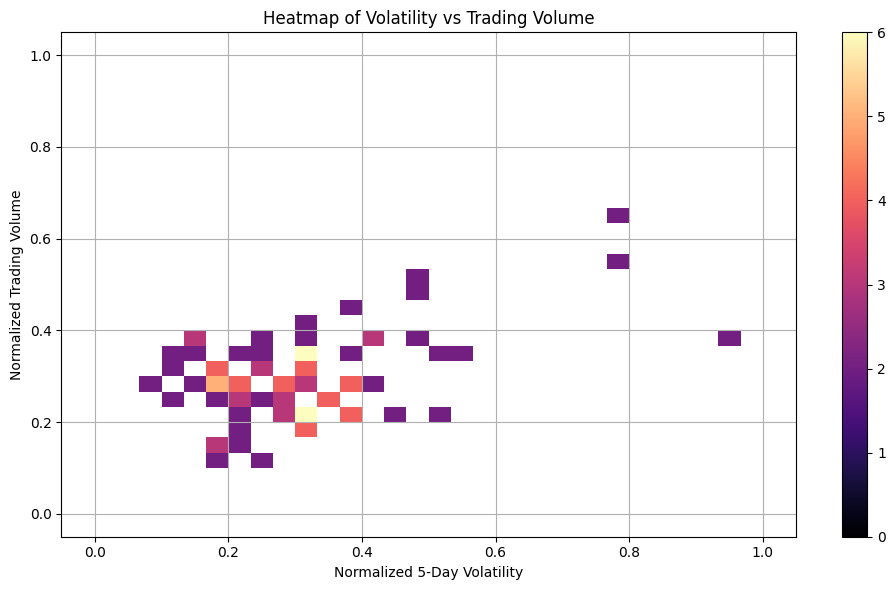

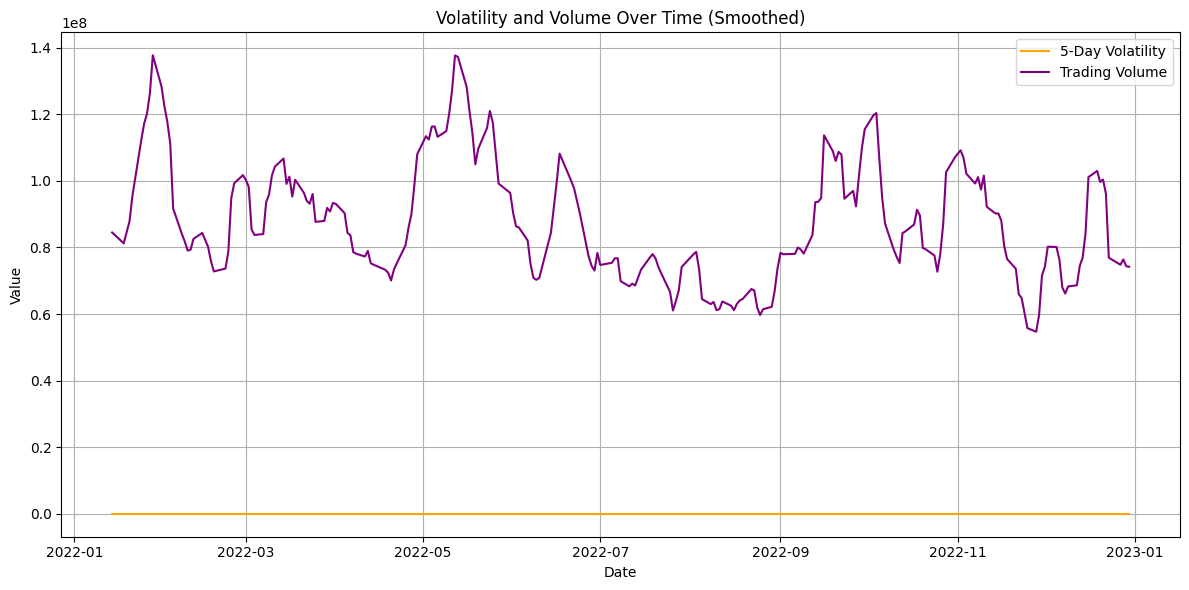

In [ ]:
# Visualizations 1 and 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import pandas as pd

def analyze_stock_trend(symbol, start_date, end_date, api_key):
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",
        "apikey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print("API error or limit reached")
        return None

    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index")
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df.columns = ["Open", "High", "Low", "Close", "Volume"]

    # Convert all values to float
    df = df.astype(float)

    # Filter by date
    df = df[(df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))]
    return df

# Fetch the stock data
df_filtered = analyze_stock_trend("AAPL", "2022-01-01", "2022-12-31", "35cac7ac68cf8967e3bc229248a1cfc5")

# Proceed if data is valid
if df_filtered is not None:
    df = df_filtered.copy()

    # Calculate daily return and 5-day rolling volatility
    df['Daily Return'] = df['Close'].pct_change()
    df['Volatility (5D)'] = df['Daily Return'].rolling(window=5).std()

    # Drop NA values
    df.dropna(subset=['Volatility (5D)', 'Volume'], inplace=True)

    # Normalize for heatmap
    df['Volatility Norm'] = (df['Volatility (5D)'] - df['Volatility (5D)'].min()) / (df['Volatility (5D)'].max() - df['Volatility (5D)'].min())
    df['Volume Norm'] = (df['Volume'] - df['Volume'].min()) / (df['Volume'].max() - df['Volume'].min())

    # Volatility vs Volume
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df, x='Volatility Norm', y='Volume Norm',
        bins=30, pthresh=0.01, cmap='magma', cbar=True
    )
    plt.title('Heatmap of Volatility vs Trading Volume')
    plt.xlabel('Normalized 5-Day Volatility')
    plt.ylabel('Normalized Trading Volume')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    #  Volatility and Volume Over Time
    df['Volatility_Smoothed'] = df['Volatility (5D)'].rolling(window=5).mean()
    df['Volume_Smoothed'] = df['Volume'].rolling(window=5).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Volatility_Smoothed'], label='5-Day Volatility', color='orange')
    plt.plot(df.index, df['Volume_Smoothed'], label='Trading Volume', color='purple')
    plt.title('Volatility and Volume Over Time (Smoothed)')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**Additional:**

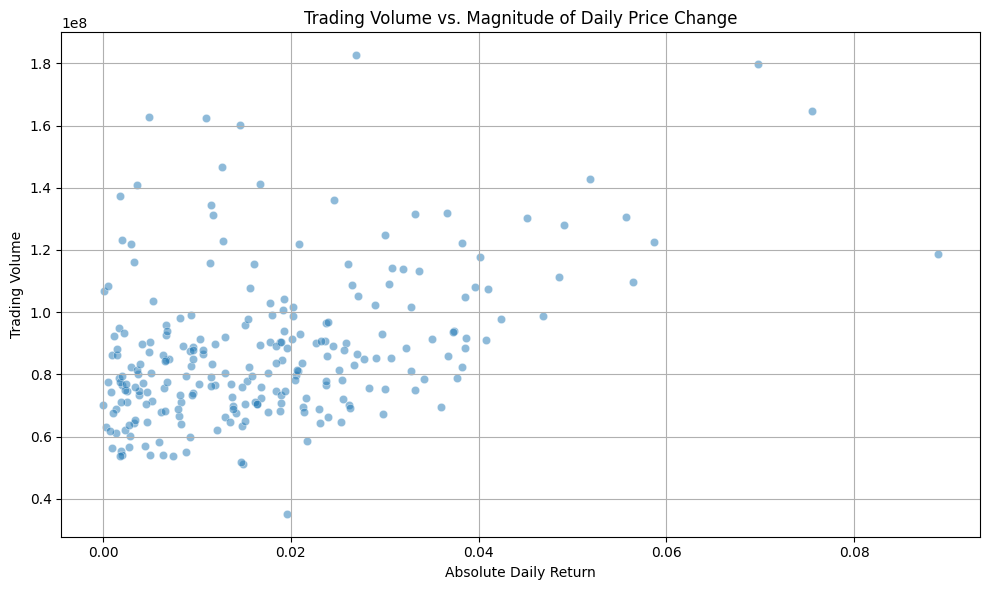

In [ ]:
# Additional:

# absolute return column
df['Abs_Return'] = df['Daily Return'].abs()

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Abs_Return', y='Volume', data=df, alpha=0.5)
plt.title('Trading Volume vs. Magnitude of Daily Price Change')
plt.xlabel('Absolute Daily Return')
plt.ylabel('Trading Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Member: Rithika Nagireddy**

**ML/Stat:**

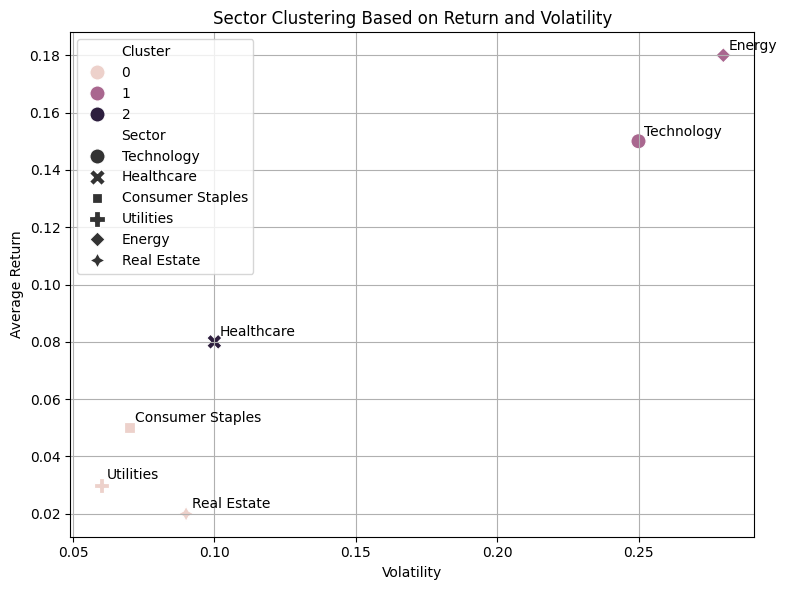

In [ ]:
# ML/Stat:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sample sector return and volatility data
sectors = ['Technology', 'Healthcare', 'Consumer Staples', 'Utilities', 'Energy', 'Real Estate']
avg_return = [0.15, 0.08, 0.05, 0.03, 0.18, 0.02]
volatility = [0.25, 0.10, 0.07, 0.06, 0.28, 0.09]
df = pd.DataFrame({'Sector': sectors, 'Avg Return': avg_return, 'Volatility': volatility})

# Normalize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Avg Return', 'Volatility']])

# Apply KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Cluster visualization
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Volatility', y='Avg Return', hue='Cluster', style='Sector', s=120)
for i in range(len(df)):
    plt.text(df['Volatility'][i] + 0.002, df['Avg Return'][i] + 0.002, df['Sector'][i])
plt.title("Sector Clustering Based on Return and Volatility")
plt.xlabel("Volatility")
plt.ylabel("Average Return")
plt.grid(True)
plt.tight_layout()
plt.show()

**Visualization 1:**

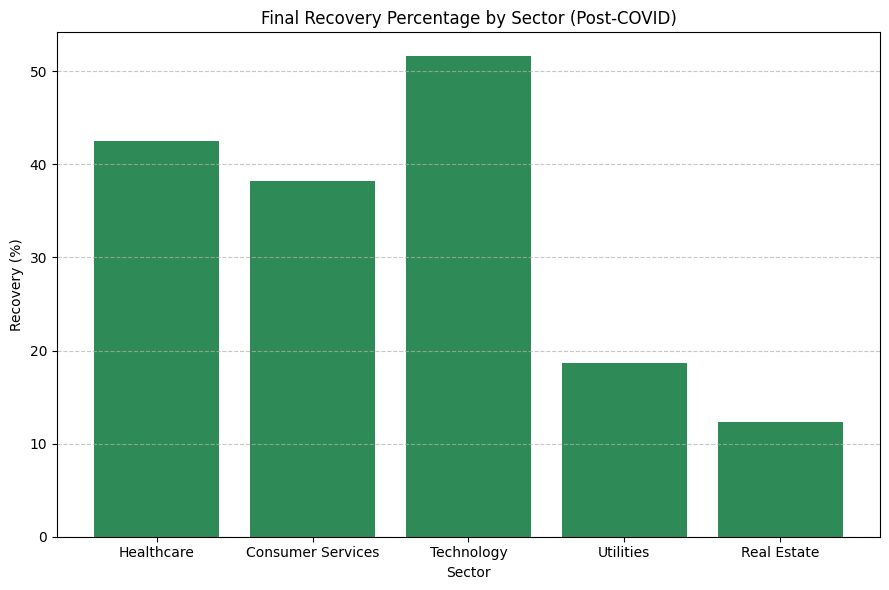

In [ ]:
# Visualization 1: Final Recovery % by Sector (Post-COVID)

import matplotlib.pyplot as plt

# Simulated final recovery percent change from market crash to June
sectors = ['Healthcare', 'Consumer Services', 'Technology', 'Utilities', 'Real Estate']
recovery_pct = [42.5, 38.2, 51.6, 18.7, 12.3]

plt.figure(figsize=(9,6))
plt.bar(sectors, recovery_pct, color='seagreen')
plt.title("Final Recovery Percentage by Sector (Post-COVID)")
plt.xlabel("Sector")
plt.ylabel("Recovery (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Visualization 2:**

<ipython-input-14-09232cfe0399>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_vol, x='Vol_Group', y='Volume', palette='coolwarm')


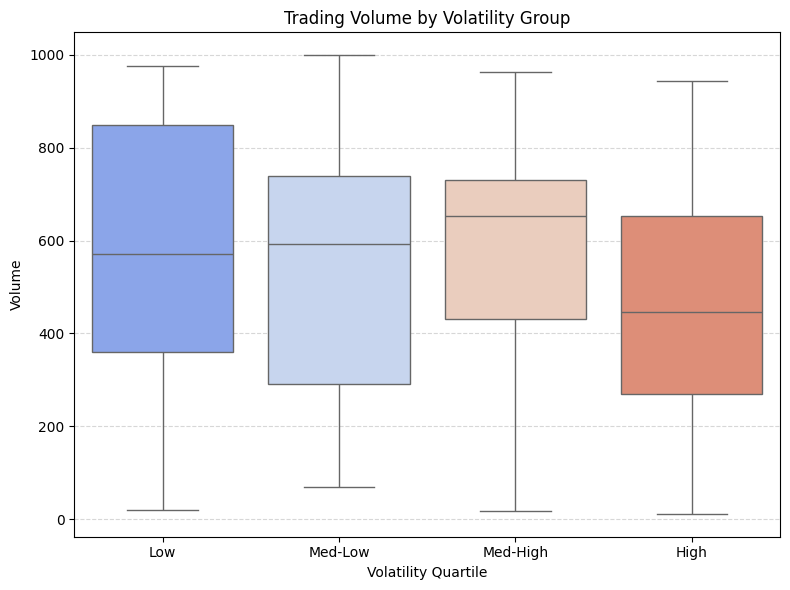

In [ ]:
# Visualization 2: Trading Volume by Volatility Group (Boxplot)

import numpy as np
import seaborn as sns

# Simulated volatility and volume data
np.random.seed(0)
volatility = np.random.rand(100)
volume = np.random.rand(100) * 1000
df_vol = pd.DataFrame({'Volatility': volatility, 'Volume': volume})
df_vol['Vol_Group'] = pd.qcut(df_vol['Volatility'], 4, labels=['Low', 'Med-Low', 'Med-High', 'High'])

# Plot boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df_vol, x='Vol_Group', y='Volume', palette='coolwarm')
plt.title("Trading Volume by Volatility Group")
plt.xlabel("Volatility Quartile")
plt.ylabel("Volume")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Additional:**

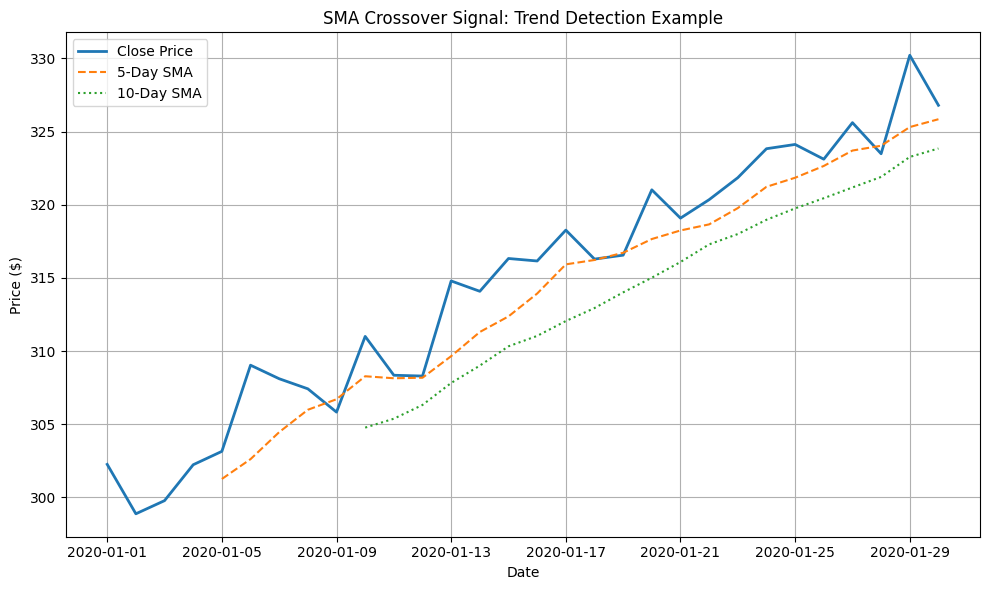

In [ ]:
# Additional: Extra Visualization
#Return After Bullish Crossover (SMA Signal)

import pandas as pd
import numpy as np

# Simulated AAPL-like stock close prices
dates = pd.date_range(start="2020-01-01", periods=30)
close_prices = np.linspace(300, 330, 30) + np.random.normal(0, 2, 30)
df_sma = pd.DataFrame({'Date': dates, 'Close': close_prices})
df_sma['5-day SMA'] = df_sma['Close'].rolling(window=5).mean()
df_sma['10-day SMA'] = df_sma['Close'].rolling(window=10).mean()

# Plot moving averages
plt.figure(figsize=(10,6))
plt.plot(df_sma['Date'], df_sma['Close'], label='Close Price', linewidth=2)
plt.plot(df_sma['Date'], df_sma['5-day SMA'], label='5-Day SMA', linestyle='--')
plt.plot(df_sma['Date'], df_sma['10-day SMA'], label='10-Day SMA', linestyle=':')
plt.title("SMA Crossover Signal: Trend Detection Example")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Member: Helly Patel**

**ML/Stat:**

In [ ]:
# ML/Stat:

sector_info = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/sector_info.csv')
stock_data = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/all_nasdaq_data.csv')

# filters tickers in both datasets
common_tickers = set(sector_info['Ticker']).intersection(set(stock_data['Ticker']))
stock_data = stock_data[stock_data['Ticker'].isin(common_tickers)]

stock_data['High'] = pd.to_numeric(stock_data['High'], errors='coerce')
stock_data['Low'] = pd.to_numeric(stock_data['Low'], errors='coerce')
stock_data['Open'] = pd.to_numeric(stock_data['Open'], errors='coerce')

# calculate daily volatility: (High - Low) / Open * 100
stock_data['Volatility'] = (stock_data['High'] - stock_data['Low']) / stock_data['Open'] * 100

# aggregates by ticker
volatility_by_ticker = stock_data.groupby('Ticker').agg({'Volatility': ['mean', 'std']}).reset_index()
volatility_by_ticker.columns = ['Ticker', 'Mean_Volatility', 'Std_Volatility']
volatility_by_ticker['Std_Volatility'] = volatility_by_ticker['Std_Volatility'].fillna(0)  # Handle missing std

data = volatility_by_ticker.merge(sector_info[['Ticker', 'Sector']], on='Ticker', how='left')

# uses Mean_Volatility and Std_Volatility for clustering
X = data[['Mean_Volatility', 'Std_Volatility']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# handles Imbalanced Sector Distribution with SMOTE
sector_labels = data['Sector'].astype('category').cat.codes
smote = SMOTE(random_state=42)
X_resampled, sector_labels_resampled = smote.fit_resample(X_scaled, sector_labels)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_resampled)
kmeans_inertia = kmeans.inertia_
kmeans_silhouette = silhouette_score(X_resampled, kmeans_labels)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(X_resampled)
agglo_silhouette = silhouette_score(X_resampled, agglo_labels)

# maps clusters back to original data
data['KMeans_Cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)
data['Agglo_Cluster'] = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_scaled)

sector_cluster_dist = data.groupby(['KMeans_Cluster', 'Sector']).size().unstack(fill_value=0)
print("Sector Distribution in K-Means Clusters:")
print(sector_cluster_dist)

# prints results
print(f"K-Means Inertia: {kmeans_inertia:.2f}")
print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"Agglomerative Silhouette Score: {agglo_silhouette:.2f}")


<ipython-input-14-53c6c2f8d50f>:4: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  stock_data = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/all_nasdaq_data.csv')


Sector Distribution in K-Means Clusters:
Sector          Basic Materials  Communication Services  Consumer Cyclical  \
KMeans_Cluster                                                               
0                            42                     109                176   
1                            37                      77                134   
2                             0                       0                  1   

Sector          Consumer Defensive  Energy  Financial Services  Healthcare  \
KMeans_Cluster                                                               
0                               84      33                 587         334   
1                               50      22                  62         652   
2                                1       1                   0           5   

Sector          Industrials  Real Estate  Technology  Unknown  Utilities  
KMeans_Cluster                                                            
0                       171

**Visualization 1:**

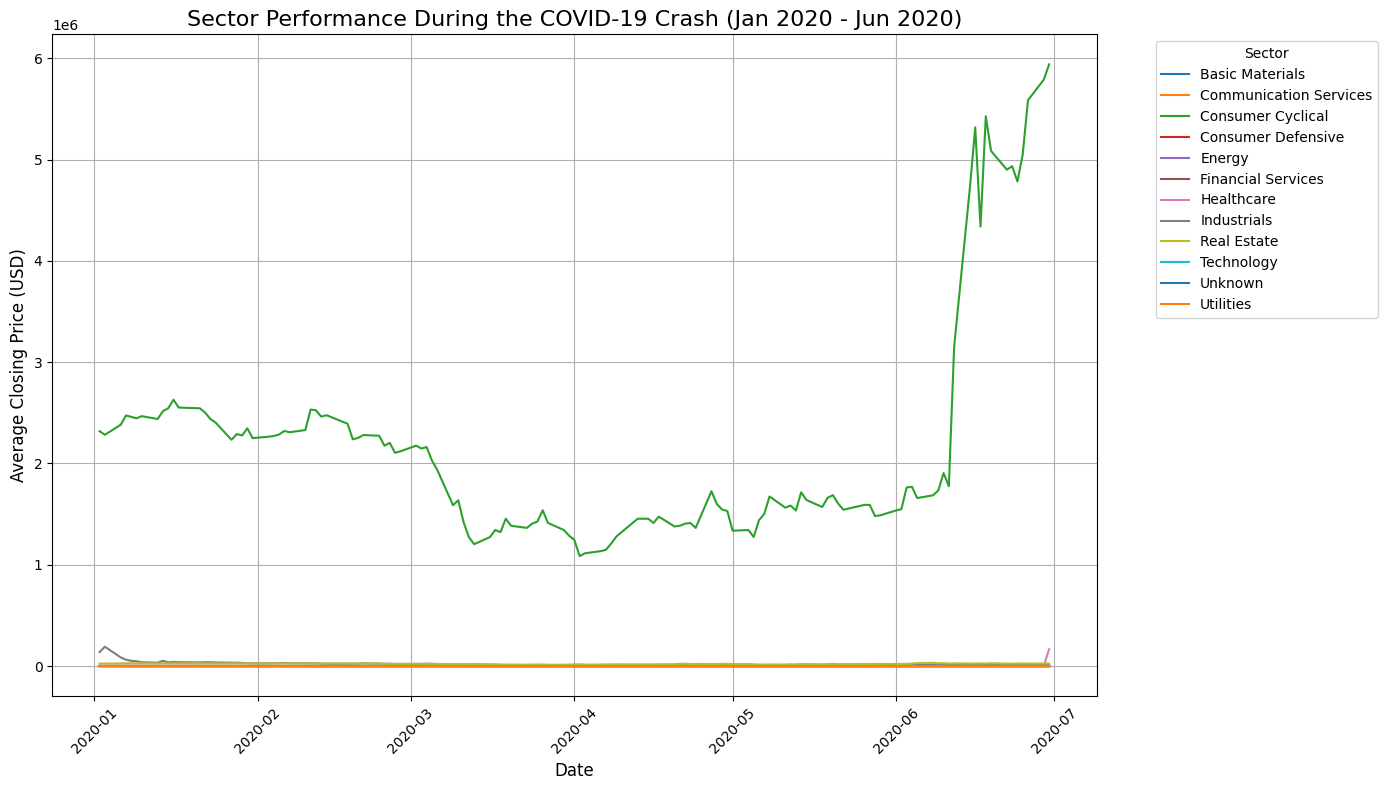

In [ ]:
# Visualization 1:

price_df = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/all_nasdaq_data.csv', low_memory=False)

price_df = price_df[price_df['Price'] != 'Ticker']
price_df = price_df[price_df['Price'] != 'Date']
price_df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker']
price_df.dropna(inplace=True)
price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df[['Close', 'High', 'Low', 'Open']] = price_df[['Close', 'High', 'Low', 'Open']].astype(float)

sector_df = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/sector_info.csv')
sector_df = sector_df.dropna(subset=['Ticker', 'Sector'])

# merges sector info into price data
df_merged = price_df.merge(sector_df, on='Ticker', how='left')

df_merged_filtered = df_merged[(df_merged['Date'] >= '2020-01-01') & (df_merged['Date'] <= '2020-06-30')]

# calculates daily average closing price for each sector
sector_avg_price = df_merged_filtered.groupby(['Date', 'Sector'])['Close'].mean().reset_index()

# creates a line plot for each sector's average price
plt.figure(figsize=(14, 8))

# plot average closing price for each sector
for sector in sector_avg_price['Sector'].unique():
    sector_data = sector_avg_price[sector_avg_price['Sector'] == sector]
    plt.plot(sector_data['Date'], sector_data['Close'], label=sector)

# displays the plot
plt.title('Sector Performance During the COVID-19 Crash (Jan 2020 - Jun 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Closing Price (USD)', fontsize=12)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Visualization 2:**

<ipython-input-19-b10fa88db3cc>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_filtered['Volatility'] = (df_merged_filtered['High'] - df_merged_filtered['Low']) / df_merged_filtered['Open'] * 100


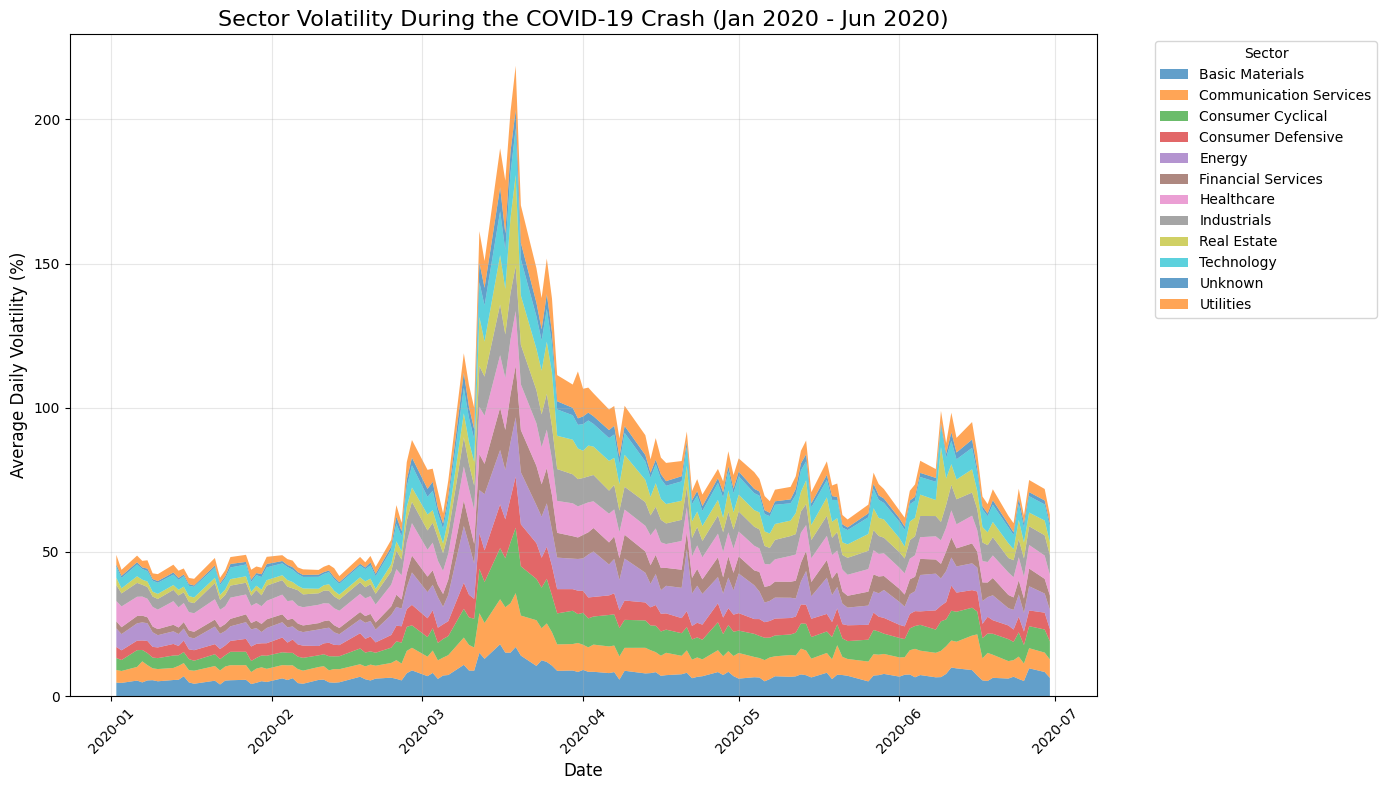

In [ ]:
# Visualization 2:

price_df = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/all_nasdaq_data.csv', low_memory=False)
sector_df = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/sector_info.csv')

price_df = price_df[price_df['Price'] != 'Ticker']
price_df = price_df[price_df['Price'] != 'Date']
price_df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Ticker']
price_df.dropna(inplace=True)

# converts data types
price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df[['Close', 'High', 'Low', 'Open']] = price_df[['Close', 'High', 'Low', 'Open']].astype(float)

sector_df = sector_df.dropna(subset=['Ticker', 'Sector'])

# merges sector info into price data
df_merged = price_df.merge(sector_df, on='Ticker', how='left')

df_merged_filtered = df_merged[(df_merged['Date'] >= '2020-01-01') & (df_merged['Date'] <= '2020-06-30')]

# calculates daily volatility
df_merged_filtered['Volatility'] = (df_merged_filtered['High'] - df_merged_filtered['Low']) / df_merged_filtered['Open'] * 100

# aggregates volatility by sector and date
sector_avg_volatility = df_merged_filtered.groupby(['Date', 'Sector'])['Volatility'].mean().reset_index()

volatility_pivot = sector_avg_volatility.pivot(index='Date', columns='Sector', values='Volatility').fillna(0)

plt.figure(figsize=(14, 8))
plt.stackplot(volatility_pivot.index, volatility_pivot.T, labels=volatility_pivot.columns, alpha=0.7)

plt.title('Sector Volatility During the COVID-19 Crash (Jan 2020 - Jun 2020)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Daily Volatility (%)', fontsize=12)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Additional:**

In [ ]:
# Additional:

sector_info = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/sector_info.csv')
stock_data = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/all_nasdaq_data.csv')

# filters tickers in both datasets
common_tickers = set(sector_info['Ticker']).intersection(set(stock_data['Ticker']))
stock_data = stock_data[stock_data['Ticker'].isin(common_tickers)]

stock_data['High'] = pd.to_numeric(stock_data['High'], errors='coerce')
stock_data['Low'] = pd.to_numeric(stock_data['Low'], errors='coerce')
stock_data['Open'] = pd.to_numeric(stock_data['Open'], errors='coerce')

# Calculate daily volatility: (High - Low) / Open * 100
stock_data['Volatility'] = (stock_data['High'] - stock_data['Low']) / stock_data['Open'] * 100

# aggregates by ticker
volatility_by_ticker = stock_data.groupby('Ticker').agg({'Volatility': ['mean', 'std']}).reset_index()
volatility_by_ticker.columns = ['Ticker', 'Mean_Volatility', 'Std_Volatility']
volatility_by_ticker['Std_Volatility'] = volatility_by_ticker['Std_Volatility'].fillna(0)  # Handle missing std

data = volatility_by_ticker.merge(sector_info[['Ticker', 'Sector']], on='Ticker', how='left')

# descriptive statistics by sector
sector_volatility_stats = data.groupby('Sector').agg({
    'Mean_Volatility': ['mean', 'std', 'min', 'max'],
    'Std_Volatility': ['mean', 'std']
}).reset_index()
sector_volatility_stats.columns = ['Sector', 'Mean_Vol_Mean', 'Mean_Vol_Std', 'Mean_Vol_Min', 'Mean_Vol_Max',
                                  'Std_Vol_Mean', 'Std_Vol_Std']

print("Descriptive Statistics by Sector:")
print(sector_volatility_stats)

<ipython-input-16-590f6b52ddee>:4: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  stock_data = pd.read_csv('/content/drive/MyDrive/CS 418 Project Bull Vs. Bear/all_nasdaq_data.csv')


Descriptive Statistics by Sector:
                    Sector  Mean_Vol_Mean  Mean_Vol_Std  Mean_Vol_Min  \
0          Basic Materials       6.634483      3.429736      0.339033   
1   Communication Services       6.489571      3.644598      0.207199   
2        Consumer Cyclical       6.818462      3.651574      2.105624   
3       Consumer Defensive       6.299916      4.555957      0.371796   
4                   Energy       5.922027      3.352956      0.684818   
5       Financial Services       3.014806      2.668980      0.000000   
6               Healthcare       7.547572      3.055291      0.000000   
7              Industrials       7.067610      4.932070      0.263658   
8              Real Estate       4.663293      3.873238      0.607002   
9               Technology       6.252352      3.927560      0.000000   
10                 Unknown       1.354421      1.867113      0.000000   
11               Utilities       5.022516      3.321341      2.021252   

    Mean_Vol_Max

# **Member: Parth Patel**

**ML/Stat:**

In [ ]:
# ML/Stat:

import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# fetches stock data
def fetch_stock_data(symbol, api_key, start_date, end_date):

    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",
        "apikey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print("Error fetching data. API response:", data)
        return None

    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index", dtype=float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df.columns = ["Open", "High", "Low", "Close", "Volume"]
    df = df[["Open", "Close", "Volume"]]

    # filters by date range
    mask = (df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))
    return df.loc[mask]

# prepares data for training
def prepare_data_for_training(df):
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Return'].rolling(window=14).std()
    df['SMA'] = df['Close'].rolling(window=14).mean()
    df = df.dropna().copy()
    df['Trend'] = (df['Close'] > df['Open']).astype(int)
    X = df[['Return', 'Volatility', 'SMA']]
    y = df['Trend']
    return X, y

# logistic regression training
def logistic_regression_model(X_train, y_train):
    model = LogisticRegression(class_weight='balanced', solver='liblinear')
    model.fit(X_train, y_train)
    return model

# evaluates the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nAccuracy: {(y_pred == y_test).mean():.2f}\n")

# balance with SMOTE
def apply_smote(X_train, y_train):
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    return smote.fit_resample(X_train, y_train)

# runs the full analysis
def run_analysis(df):
    X, y = prepare_data_for_training(df)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_res, y_train_res = apply_smote(X_train, y_train)
    scaler = StandardScaler()
    X_train_res = scaler.fit_transform(X_train_res)
    X_test = scaler.transform(X_test)
    model = logistic_regression_model(X_train_res, y_train_res)
    evaluate_model(model, X_test, y_test)

api_key = "USN9XTYS7JXVC2NM"
df = fetch_stock_data("AAPL", api_key, "2024-01-01", "2024-03-31")
if df is not None:
    run_analysis(df)
else:
    print("No data found for the given date range.")

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10

Confusion Matrix:
[[5 0]
 [2 3]]

Accuracy: 0.80



**Visualization 1:**

Fetching data for AAPL...
Fetching data for GOOGL...
Fetching data for MSFT...
Fetching data for AMZN...
Fetching data for TSLA...


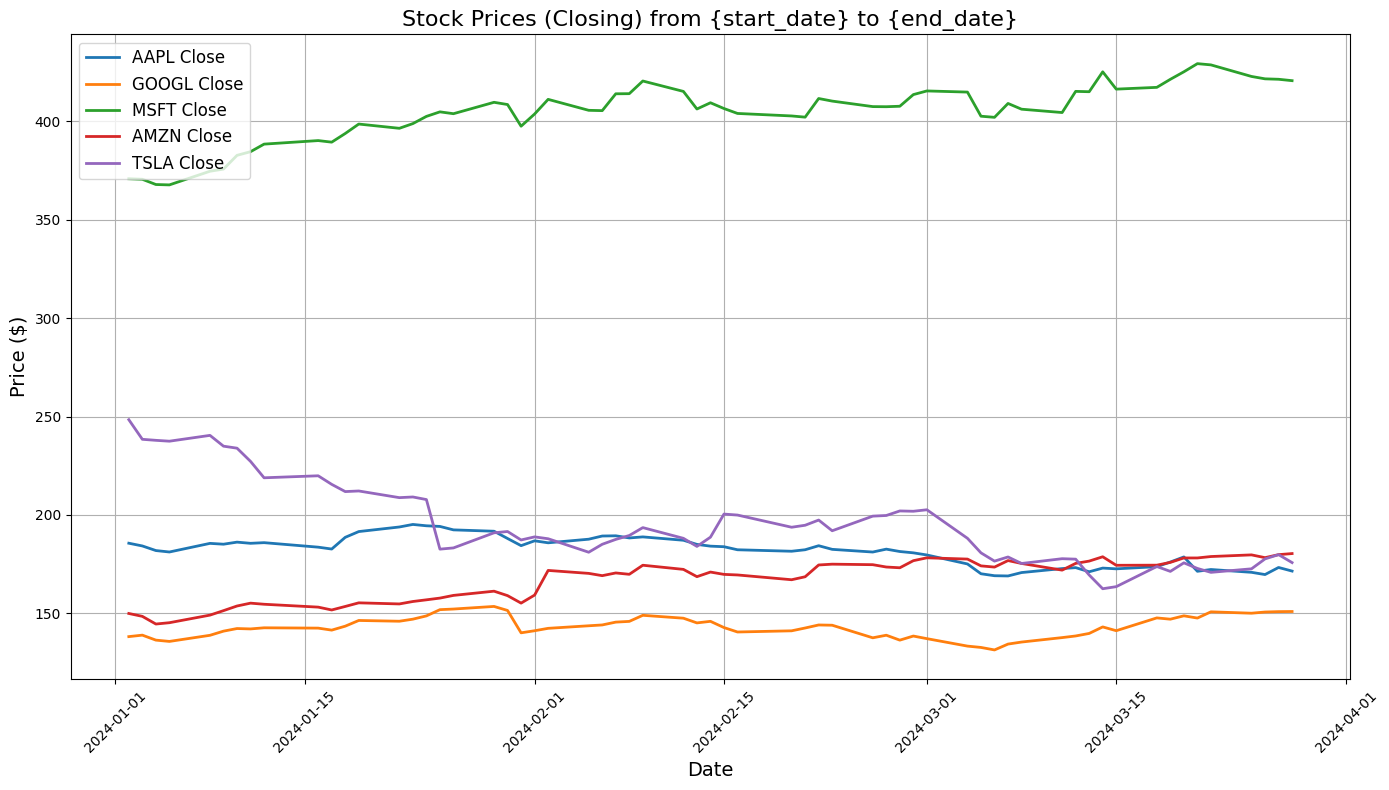

In [ ]:
# Visualization 1:

# Function to fetch stock data from Alpha Vantage API
def fetch_stock_data(symbol, api_key, start_date, end_date):
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",  # Fetch full data
        "apikey": api_key
    }
    response = requests.get(url, params=params)
    data = response.json()

    # Check for errors in the API response
    if "Time Series (Daily)" not in data:
        print(f"Error fetching data for {symbol}: {data.get('Note', 'No data found.')}")
        return None

    # Convert the data into a pandas DataFrame
    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient='index')
    df = df.rename(columns={
        "1. open": "Open",
        "2. high": "High",
        "3. low": "Low",
        "4. close": "Close",
        "5. volume": "Volume"
    })
    df.index = pd.to_datetime(df.index)  # Convert index to datetime
    df = df.sort_index()  # Sort by date

    # Ensure that columns are numeric (to avoid type issues)
    df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['High'] = pd.to_numeric(df['High'], errors='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors='coerce')

    # Filter data by the date range
    mask = (df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))
    df_filtered = df.loc[mask]

    # Handle any rows with missing data (NaN) by dropping them
    df_filtered = df_filtered.dropna()

    return df_filtered

# Plot stock price movement as lines
def plot_stock_prices_line(tickers, start_date, end_date, api_key):
    """
    Plot stock prices as lines for multiple tickers.
    :param tickers: List of stock symbols
    :param start_date: Start date for data (YYYY-MM-DD)
    :param end_date: End date for data (YYYY-MM-DD)
    :param api_key: Your Alpha Vantage API key
    """
    plt.figure(figsize=(14, 8))  # Set figure size

    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        df = fetch_stock_data(ticker, api_key, start_date, end_date)

        if df is not None:
            # Plot stock's Close price as a line
            plt.plot(df.index, df['Close'], label=f"{ticker} Close", linewidth=2)
        else:
            print(f"Skipping {ticker} due to missing data.")

    # Adding labels and title
    plt.title("Stock Prices (Closing) from {start_date} to {end_date}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Price ($)", fontsize=14)
    plt.legend(loc="upper left", fontsize=12)
    plt.grid(True)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)
    plt.tight_layout()  # Improve layout
    plt.show()

# Example: Using the functions with actual data
api_key = "USN9XTYS7JXVC2NM"  # Replace with your actual API key
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]  # List of stock tickers to analyze
start_date = "2024-01-01"  # Start date for analysis
end_date = "2024-03-31"    # End date for analysis

# Run the function to plot stock prices as lines
plot_stock_prices_line(tickers, start_date, end_date, api_key)

**Visualization 2:**

Fetching data for AAPL...
Fetching data for GOOGL...
Fetching data for MSFT...
Fetching data for AMZN...
Fetching data for TSLA...


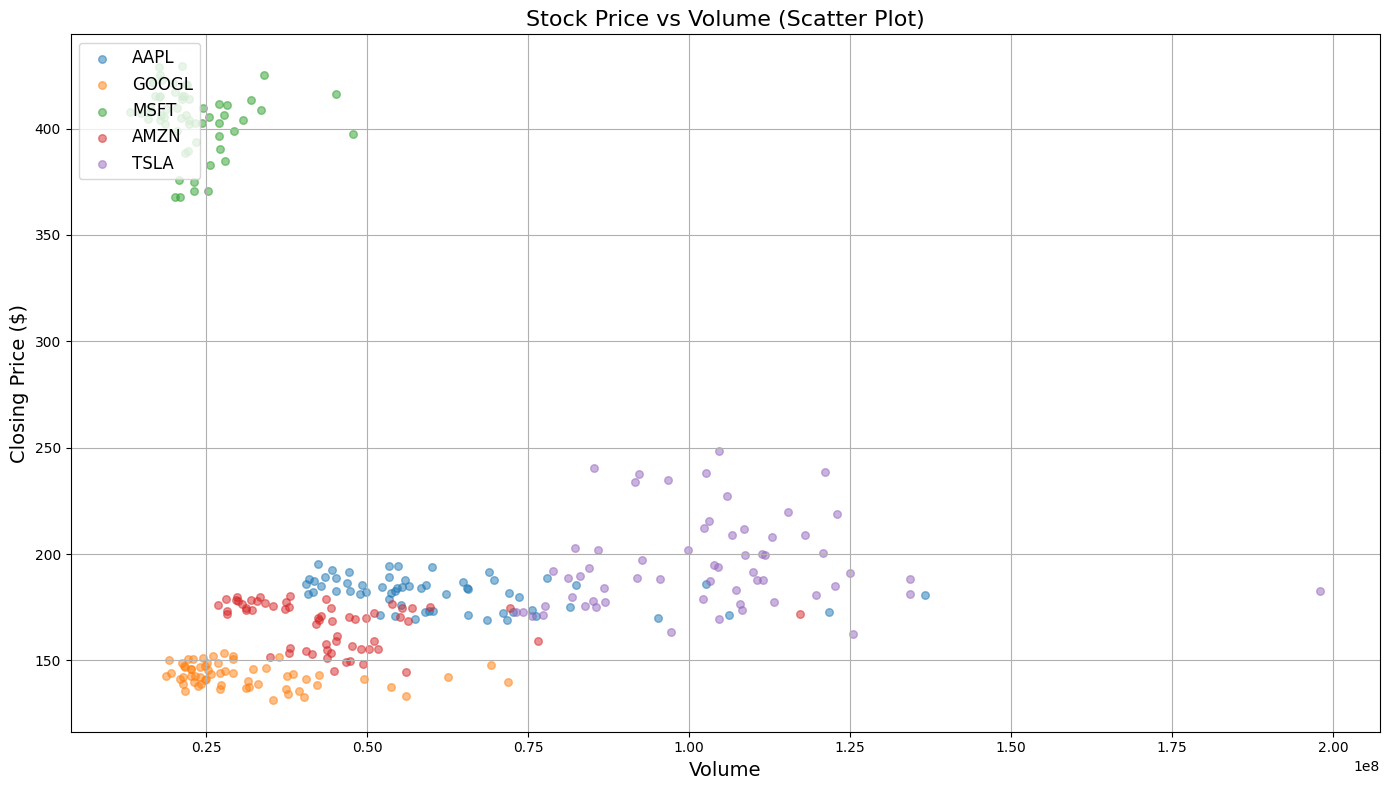

In [ ]:
# Visualization 2:
# Import necessary libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

# Function to fetch stock data from Alpha Vantage API
def fetch_stock_data(symbol, api_key, start_date, end_date):
    """
    Fetches daily stock data from Alpha Vantage API for the given symbol and date range.
    Returns a DataFrame with Open, Close, and Volume.
    """
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",  # Fetch full data
        "apikey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print("Error fetching data. API response:", data)
        return None

    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index", dtype=float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df.columns = ["Open", "High", "Low", "Close", "Volume"]
    df = df[["Open", "Close", "Volume"]]

    # Filter by date range
    mask = (df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))
    return df.loc[mask]

# Plot Stock Price vs Volume as a Scatter Plot
def plot_stock_price_vs_volume(tickers, start_date, end_date, api_key):
    """
    Plot a scatter plot of Stock Price vs. Volume for multiple tickers.
    :param tickers: List of stock symbols
    :param start_date: Start date for data (YYYY-MM-DD)
    :param end_date: End date for data (YYYY-MM-DD)
    :param api_key: Your Alpha Vantage API key
    """
    plt.figure(figsize=(14, 8))  # Set figure size

    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        df = fetch_stock_data(ticker, api_key, start_date, end_date)

        if df is not None:
            # Scatter plot of Stock's Closing Price vs. Volume
            plt.scatter(df['Volume'], df['Close'], label=f"{ticker}", alpha=0.5, s=30)

        else:
            print(f"Skipping {ticker} due to missing data.")

    # Adding labels and title
    plt.title("Stock Price vs Volume (Scatter Plot)", fontsize=16)
    plt.xlabel("Volume", fontsize=14)
    plt.ylabel("Closing Price ($)", fontsize=14)
    plt.legend(loc="upper left", fontsize=12)
    plt.grid(True)

    # Display the plot
    plt.tight_layout()  # Improve layout
    plt.show()

# Example: Using the functions with actual data
api_key = "USN9XTYS7JXVC2NM"  # Replace with your actual API key
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]  # List of stock tickers to analyze
start_date = "2024-01-01"  # Start date for analysis
end_date = "2024-03-31"    # End date for analysis

# Run the function to plot Stock Price vs Volume as a scatter plot
plot_stock_price_vs_volume(tickers, start_date, end_date, api_key)


**Additional:**

In [ ]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Function to fetch stock data from Alpha Vantage API
def fetch_stock_data(symbol, api_key, start_date, end_date):
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_DAILY",
        "symbol": symbol,
        "outputsize": "full",
        "apikey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print(f"Error fetching data for {symbol}: {data.get('Note', 'No data found.')}")
        return None

    df = pd.DataFrame.from_dict(data["Time Series (Daily)"], orient="index", dtype=float)
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df.columns = ["Open", "High", "Low", "Close", "Volume"]
    df = df[["Open", "Close", "Volume"]]

    # Filter by date range
    mask = (df.index >= pd.to_datetime(start_date)) & (df.index <= pd.to_datetime(end_date))
    return df.loc[mask]

# Prepare the data for training
def prepare_data_for_training(df):
    df['Return'] = df['Close'].pct_change()
    df['Volatility'] = df['Return'].rolling(window=14).std()
    df['SMA'] = df['Close'].rolling(window=14).mean()
    df = df.dropna().copy()
    X = df[['Return', 'Volatility', 'SMA']]
    y = df['Close']  # 'Close' price is the continuous target variable
    return X, y

# Train Random Forest Regressor
def random_forest_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    return mse, rmse

# Run the full analysis for multiple stocks
def run_analysis(stocks, start_date, end_date, api_key):
    results = {}

    for symbol in stocks:
        print(f"Fetching data for {symbol}...")
        df = fetch_stock_data(symbol, api_key, start_date, end_date)

        if df is not None:
            X, y = prepare_data_for_training(df)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model = random_forest_model(X_train, y_train)
            mse, rmse = evaluate_model(model, X_test, y_test)

            results[symbol] = {
                'MSE': mse,
                'RMSE': rmse
            }

    return results

# Main function
api_key = "USN9XTYS7JXVC2NM"  # API Key
stocks = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA"]  # List of stocks to analyze
start_date = "2024-01-01"  # Start date for analysis
end_date = "2024-03-31"  # End date for analysis

# Run the analysis for all stocks
results = run_analysis(stocks, start_date, end_date, api_key)

# Print the results
for symbol, metrics in results.items():
    print(f"")
    print(f"Results for {symbol}:")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print()


Fetching data for AAPL...
Fetching data for GOOGL...
Fetching data for MSFT...
Fetching data for AMZN...
Fetching data for TSLA...

Results for AAPL:
Mean Squared Error (MSE): 6.16
Root Mean Squared Error (RMSE): 2.48


Results for GOOGL:
Mean Squared Error (MSE): 16.92
Root Mean Squared Error (RMSE): 4.11


Results for MSFT:
Mean Squared Error (MSE): 20.61
Root Mean Squared Error (RMSE): 4.54


Results for AMZN:
Mean Squared Error (MSE): 4.14
Root Mean Squared Error (RMSE): 2.03


Results for TSLA:
Mean Squared Error (MSE): 46.92
Root Mean Squared Error (RMSE): 6.85

